# Week 4 Assignment  
## K Means Clustering

In this assignment I will be segmenting the dataset using the k means algorythm

In [1]:
%matplotlib inline

# Import libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('talk')

# Make results reproducible
np.random.seed(1234567890)

df = pd.read_csv('gapminder.csv')

variables = ['incomeperperson', 'polityscore', 'internetuserate', 'lifeexpectancy','urbanrate']

# convert to numeric format
for variable in variables:
    df[variable] = pd.to_numeric(df[variable], errors='coerce')

# listwise deletion of missing values
subset = df[variables].dropna()

# Print the rows and columns of the data frame
print('Size of study data')
print(subset.shape)

Size of study data
(153, 5)


## Data Management  

In [2]:
# Remove the first variable from the list since the target is derived from it
variables.pop(0)
variables.pop(0)

# Center and scale data
for variable in variables:
    subset[variable]=preprocessing.scale(subset[variable].astype('float64'))
    
features = subset[variables]
targets = subset[['incomeperperson', 'polityscore']]

### Split Data into Training and Test Sets  

In [3]:
training_data, test_data, training_target, test_target  = train_test_split(features, targets, test_size=.3)

## Determine the Number of Clusters

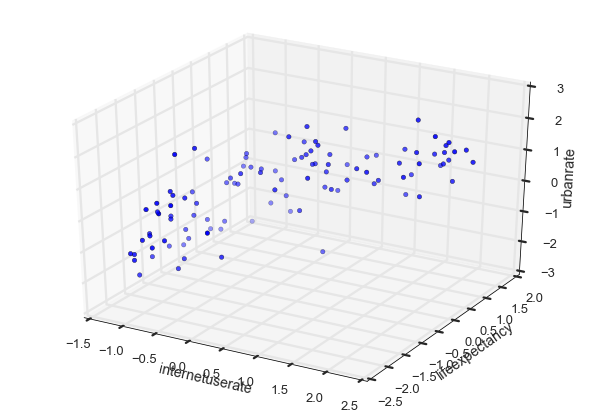

In [4]:
# Visualize the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(training_data.iloc[:,0], training_data.iloc[:,1], training_data.iloc[:,2])
ax.set_xlabel(training_data.columns.values[0])
ax.set_ylabel(training_data.columns.values[1])
ax.set_zlabel(training_data.columns.values[2])
plt.show()

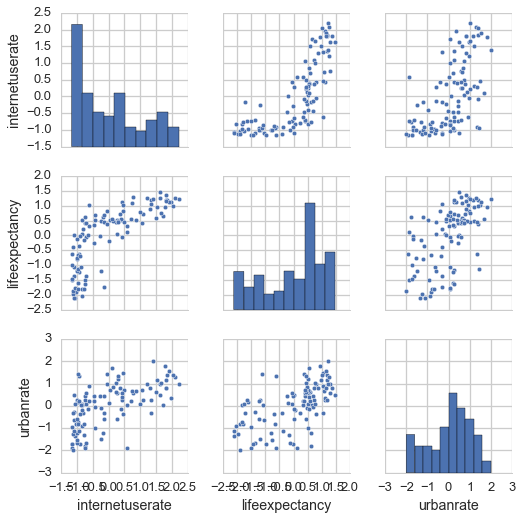

In [5]:
sns.pairplot(training_data);

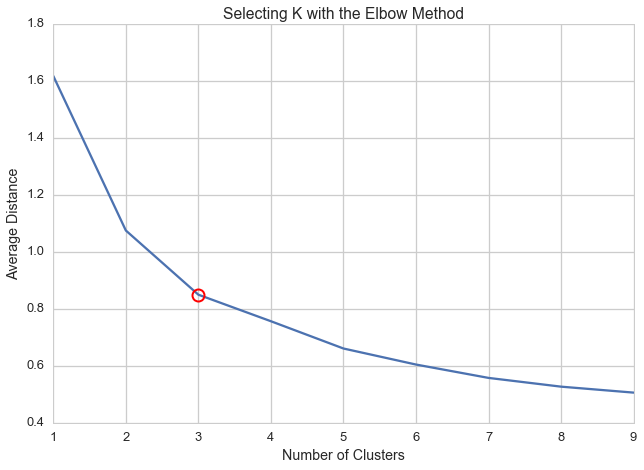

In [6]:
# Identify number of clusters using the elbow method
clusters=range(1,10)
meandist=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(training_data)
    clusassign=model.predict(training_data)
    meandist.append(sum(np.min(cdist(training_data, model.cluster_centers_, 'euclidean'), axis=1)) / training_data.shape[0])

# Visualize the elbow
k = 3

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(clusters, meandist)
ax.plot(clusters[(k-1)], meandist[(k-1)], marker='o', markersize=12, 
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of Clusters')
plt.ylabel('Average Distance')
plt.title('Selecting K with the Elbow Method')
plt.show()

## Visualize Clustered Data

E:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


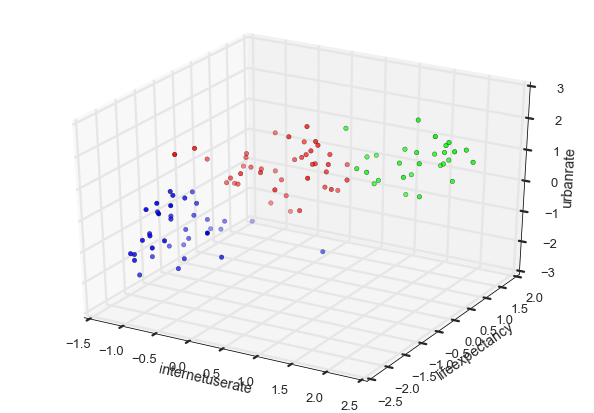

In [7]:
model=KMeans(n_clusters=k)
model.fit(training_data)
training_data['cluster'] = model.labels_
# Change Colors
my_cmap = plt.cm.get_cmap('brg')
my_cmap.set_under('w')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(training_data.iloc[:,0], training_data.iloc[:,1], training_data.iloc[:,2], c=training_data['cluster'], cmap=my_cmap)
ax.set_xlabel(training_data.columns.values[0])
ax.set_ylabel(training_data.columns.values[1])
ax.set_zlabel(training_data.columns.values[2])
plt.show()

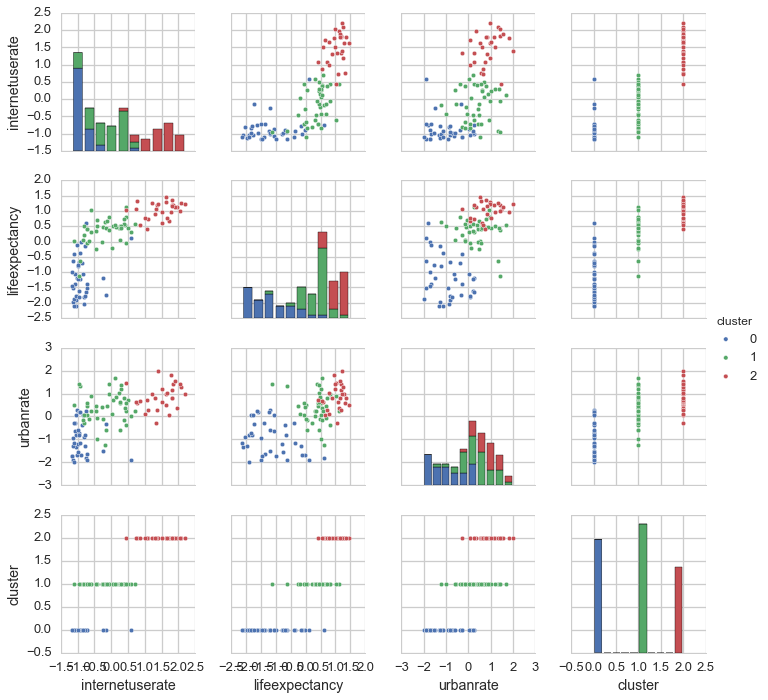

In [8]:
sns.pairplot(training_data, hue ='cluster');

## Examine Differences Between Clusters

In [9]:
# Add Cluster label to training targets
training_target['cluster'] = model.labels_
# OLS regression
income_model = smf.ols(formula='incomeperperson ~ C(cluster)', data=training_target).fit()
print (income_model.summary())

                            OLS Regression Results                            
Dep. Variable:        incomeperperson   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     92.81
Date:                Wed, 24 Feb 2016   Prob (F-statistic):           7.41e-24
Time:                        14:08:33   Log-Likelihood:                -1086.1
No. Observations:                 107   AIC:                             2178.
Df Residuals:                     104   BIC:                             2186.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept        1276.5697   1033.483     

E:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [10]:
polityscore_model = smf.ols(formula='polityscore ~ C(cluster)', data=training_target).fit()
print (polityscore_model.summary())

                            OLS Regression Results                            
Dep. Variable:            polityscore   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     6.119
Date:                Wed, 24 Feb 2016   Prob (F-statistic):            0.00307
Time:                        14:08:33   Log-Likelihood:                -339.60
No. Observations:                 107   AIC:                             685.2
Df Residuals:                     104   BIC:                             693.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept           2.0541      0.964     

In [11]:
print ('means for features by cluster')
m1= training_target.groupby('cluster').mean()
print (m1)

means for features by cluster
         incomeperperson  polityscore
cluster                              
0            1276.569745     2.054054
1            3025.679972     3.952381
2           20966.706944     7.178571


In [12]:
print ('standard deviations for features by cluster')
m2= training_target.groupby('cluster').std()
print (m2)

standard deviations for features by cluster
         incomeperperson  polityscore
cluster                              
0            2228.255215     5.390042
1            2586.986552     6.120547
2           11637.834872     6.073949


In [13]:
mc1 = multi.MultiComparison(training_target['incomeperperson'], training_target['cluster'])
res1 = mc1.tukeyhsd()
print(res1.summary())

  Multiple Comparison of Means - Tukey HSD,FWER=0.05 
group1 group2  meandiff    lower      upper    reject
-----------------------------------------------------
  0      1    1749.1102  -1621.2852 5119.5056  False 
  0      2    19690.1372 15945.846  23434.4284  True 
  1      2    17941.027  14294.0067 21588.0472  True 
-----------------------------------------------------


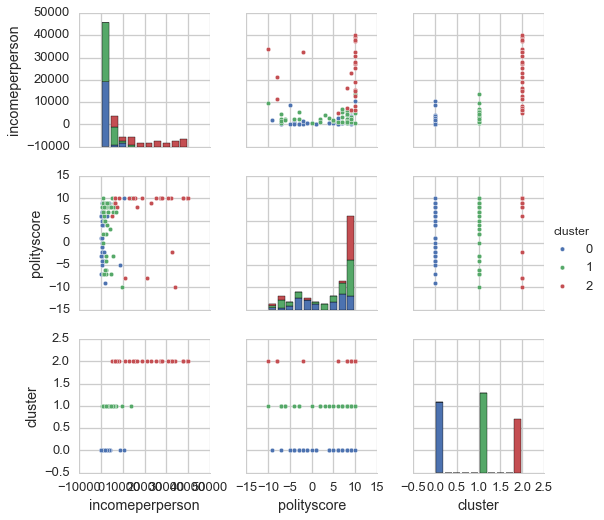

In [14]:
sns.pairplot(training_target, hue ='cluster');